In [ ]:
!nvidia-smi

Sun Oct  9 02:51:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip freeze

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.2
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 34.3 MB/s 
     |████████████████████████████████| 1.6 MB 48.7 MB/s 


In [ ]:
# importing libraries
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch
%matplotlib inline 

In [ ]:
# !pip install keras-tuner --upgrade

In [ ]:
os.listdir()

['.config', 'Churn_Modelling.csv', 'sample_data']

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# one hot encoding 
geography_ohe = pd.get_dummies(df.Geography, prefix = 'Geography')
gender_ohe = pd.get_dummies(df.Gender, prefix = 'Gender')

display(geography_ohe)
display(gender_ohe)

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [ ]:
data = pd.concat([df,geography_ohe,gender_ohe ], axis = 'columns').drop(columns = ['Geography','Gender'])
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# splitting the data
train, test = train_test_split(data, test_size = 0.2, random_state = 64)
train.shape, test.shape

((8000, 14), (2000, 14))

In [ ]:
# Normalizing the data 
normalizer_tr, normalize_ts = MinMaxScaler(), MinMaxScaler()

train_scaled = pd.DataFrame(normalizer_tr.fit_transform(train), columns = train.columns)
test_scaled = pd.DataFrame(normalize_ts.fit_transform(test), columns = test.columns)

display(train_scaled)
display(test_scaled)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.442,0.391892,0.7,0.000000,0.333333,0.0,0.0,0.561831,0.0,1.0,0.0,0.0,1.0,0.0
1,0.358,0.216216,0.9,0.000000,0.000000,1.0,1.0,0.466028,0.0,0.0,0.0,1.0,0.0,1.0
2,0.612,0.364865,0.7,0.581644,0.000000,1.0,1.0,0.996998,0.0,1.0,0.0,0.0,1.0,0.0
3,0.854,0.148649,0.9,0.523083,0.000000,1.0,1.0,0.818751,1.0,1.0,0.0,0.0,1.0,0.0
4,0.848,0.243243,0.9,0.521366,0.000000,1.0,0.0,0.761466,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.502,0.324324,0.1,0.392573,0.000000,1.0,0.0,0.200035,1.0,0.0,1.0,0.0,0.0,1.0
7996,0.650,0.486486,0.6,0.000000,0.000000,1.0,0.0,0.551364,1.0,1.0,0.0,0.0,0.0,1.0
7997,0.190,0.256757,0.3,0.000000,0.333333,1.0,1.0,0.900090,0.0,1.0,0.0,0.0,0.0,1.0
7998,0.520,0.256757,0.0,0.000000,0.000000,1.0,0.0,0.572570,0.0,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.474,0.587302,0.9,0.000000,0.000000,1.0,0.0,0.322775,0.0,1.0,0.0,0.0,0.0,1.0
1,0.670,0.396825,0.9,0.000000,0.333333,1.0,0.0,0.539040,0.0,0.0,0.0,1.0,0.0,1.0
2,0.884,0.015873,0.7,0.673897,0.000000,1.0,0.0,0.166097,0.0,1.0,0.0,0.0,0.0,1.0
3,0.858,0.349206,0.2,0.354690,0.000000,1.0,1.0,0.264232,0.0,0.0,1.0,0.0,1.0,0.0
4,0.994,0.761905,0.7,0.581642,0.000000,0.0,1.0,0.265549,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.820,0.301587,0.7,0.000000,0.000000,0.0,0.0,0.163998,1.0,1.0,0.0,0.0,0.0,1.0
1996,0.730,0.428571,0.4,0.000000,0.333333,1.0,1.0,0.274991,0.0,1.0,0.0,0.0,0.0,1.0
1997,0.654,0.396825,0.3,0.626074,0.333333,1.0,1.0,0.479620,0.0,0.0,0.0,1.0,1.0,0.0
1998,0.848,0.285714,0.8,0.550584,0.000000,0.0,0.0,0.509101,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
target = 'Exited'

x_tr, y_tr = train_scaled.drop(columns = [target]), train_scaled[[target]]
x_ts, y_ts = test_scaled.drop(columns = [target]), test_scaled[[target]]

x_tr.shape, y_tr.shape, x_ts.shape, y_ts.shape 

((8000, 13), (8000, 1), (2000, 13), (2000, 1))

# Building the Neural Network
## Squential_stack 
### input layer
### hidden layer
### output layer

## Each layer has an activation function common for all the neuron 
## Each layer would have a distinct kernel initializer ( weight initializer)
## Each network would have to be compiled using a particular optimization_function
## Each network would have to be compiled using a particular loss function 

## How to generate input layer tf.keras.layers.Input(shape = (13,))
## how to generate hidden layer tf.keras.Dense(units = number_of_neuron, activation = actiavation_fun, kernel_initializer = weight_initializer)
## How to generate out put layer tf.keras.Dense(units = number_of_neuron, activation = actiavation_fun, kernel_initializer = weight_initializer)

In [ ]:
#____________Generating the basic structure of ANN _____________
# instance of model
model = tf.keras.Sequential()

## Adding the input layer 
model.add(tf.keras.layers.Input(shape = (13,)))

# Adding the hidden layers
# Hidden layer I
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu',kernel_initializer = 'he_normal'))

# Hidden layer II
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu', kernel_initializer = 'he_normal'))

# Adding the out put layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_normal'))

#__________Compilining the model_________________________
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])



In [ ]:
# summarizing the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from traitlets.traitlets import validate
# Trainig the Model 
history_object = model.fit(x = x_tr,
                           y = y_tr,
                           batch_size = 512,
                           epochs = 100,
                           validation_data = (x_ts, y_ts),
                           validation_batch_size = 512,
                           use_multiprocessing = True,
                           workers = 20)

Epoch 1/100
16/16 [==============================] - 3s 28ms/step - loss: 0.7068 - accuracy: 0.4679 - precision: 0.1829 - recall: 0.4578 - val_loss: 0.6858 - val_accuracy: 0.5995 - val_precision: 0.1620 - val_recall: 0.2500
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6742 - accuracy: 0.6582 - precision: 0.1745 - recall: 0.1775 - val_loss: 0.6552 - val_accuracy: 0.7345 - val_precision: 0.1436 - val_recall: 0.0714
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6439 - accuracy: 0.7639 - precision: 0.1823 - recall: 0.0426 - val_loss: 0.6260 - val_accuracy: 0.7990 - val_precision: 0.1429 - val_recall: 0.0051
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6159 - accuracy: 0.7930 - precision: 0.2609 - recall: 0.0036 - val_loss: 0.5994 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5909 - accuracy: 0.7944 

In [ ]:
type(history_object)

keras.callbacks.History

In [ ]:
dir(history_object)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [ ]:
# fetching the required data from history object

def visualizer(history_obj, parameter):
  plt.figure(figsize = (24,10))
  train_param = history_obj.history.get(parameter)
  val_param = history_obj.history.get(f'val_{parameter}')
  epochs = history_obj.epoch

  sns.lineplot(x = epochs, y = train_param)
  sns.lineplot(x = epochs, y = val_param)

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 90)
  plt.yticks(ticks = [i/100 for i in range(10,110,10)],labels = [i/100 for i in range(10,110,10)])
  plt.show()

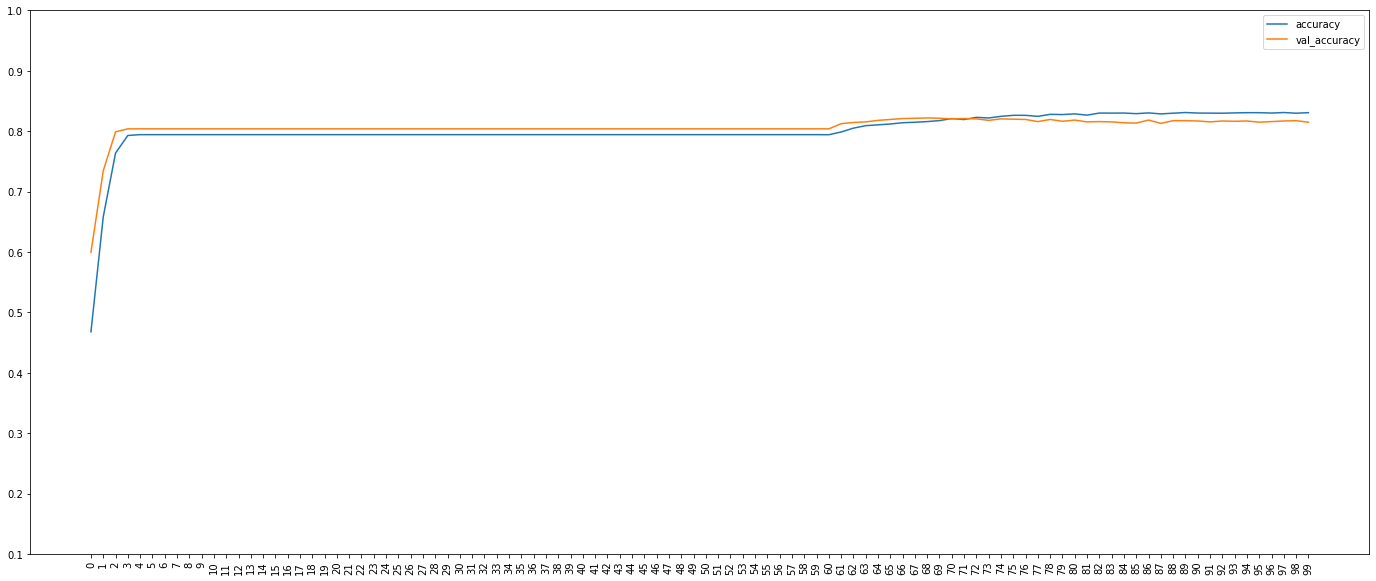

In [ ]:
visualizer(history_object,'accuracy')

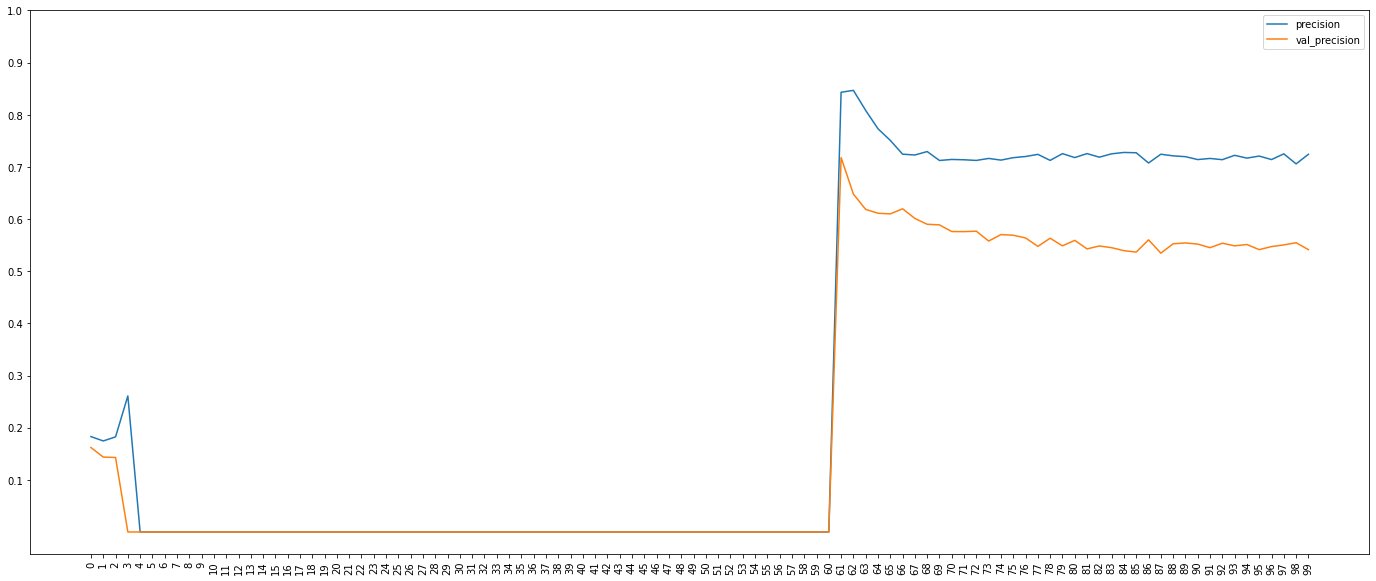

In [ ]:
visualizer(history_object, 'precision')

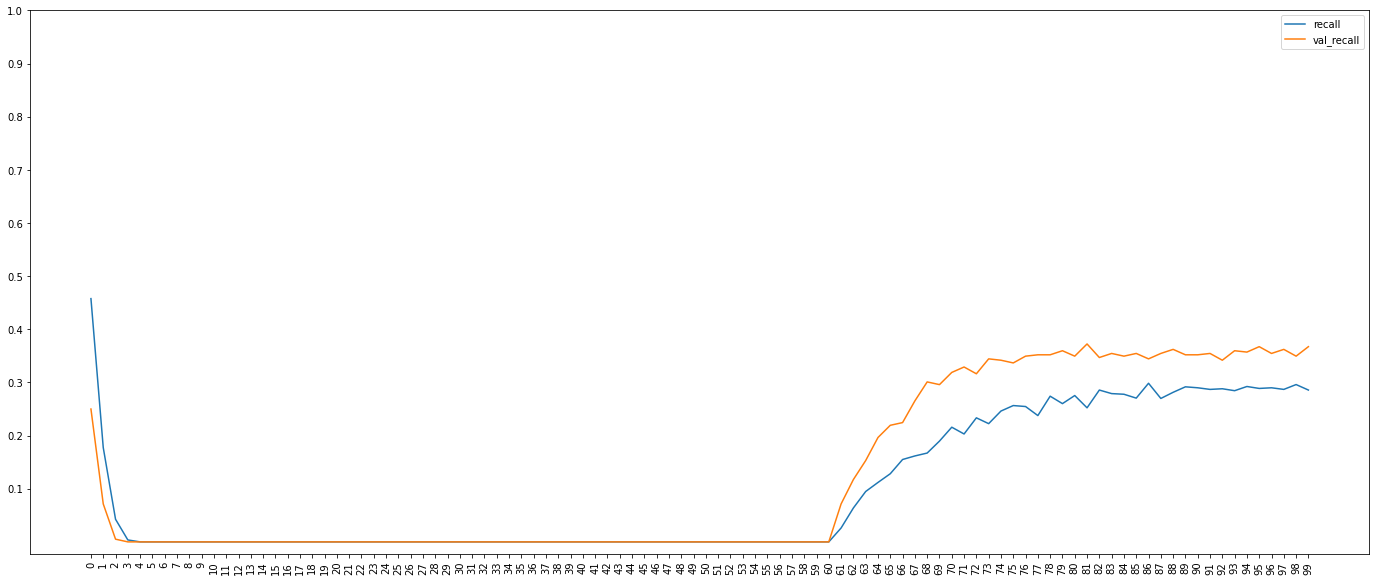

In [ ]:
visualizer(history_object, 'recall')

In [ ]:
# Early Stopping 

early_stopper = EarlyStopping(monitor = 'accuracy', patience = 10 )

In [ ]:
history_object = model.fit(x = x_tr,
                           y = y_tr,
                           batch_size = 512,
                           epochs = 100,
                           validation_data = (x_ts, y_ts),
                           validation_batch_size = 512,
                           use_multiprocessing = True,
                           workers = 20,
                           callbacks = [early_stopper])

Epoch 1/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8306 - precision: 0.7145 - recall: 0.2936 - val_loss: 0.4252 - val_accuracy: 0.8175 - val_precision: 0.5525 - val_recall: 0.3622
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8310 - precision: 0.7203 - recall: 0.2912 - val_loss: 0.4252 - val_accuracy: 0.8170 - val_precision: 0.5500 - val_recall: 0.3648
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4098 - accuracy: 0.8300 - precision: 0.7074 - recall: 0.2954 - val_loss: 0.4260 - val_accuracy: 0.8145 - val_precision: 0.5393 - val_recall: 0.3673
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4096 - accuracy: 0.8304 - precision: 0.7099 - recall: 0.2960 - val_loss: 0.4241 - val_accuracy: 0.8185 - val_precision: 0.5564 - val_recall: 0.3648
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4095 - accuracy: 0.8309 - precisi

# Hyper Parameter Tuning
## 1. hyperparmeter.Choice(tag_for_the_parameter_been_tune,list_of_elements)
## 2. hyperparmeter.Int(tag_for_the_parameter_been_tune,range_of_elements)

In [ ]:
def hypermodel(hyp):
  # instance of model
  model1 = tf.keras.Sequential()

  ## Adding the input layer 
  model1.add(tf.keras.layers.Input(shape = (13,)))

  # Adding the hidden layers
  for layer_num in range(hyp.Int('number of hidden layers',min_value = 1, max_value = 18)):

    model1.add(tf.keras.layers.Dense(units = hyp.Int(f'number of neurons in layer {layer_num}',min_value = 4, max_value = 20, step = 4), 
                                     activation = hyp.Choice(f'Activation function for layer {layer_num}',['sigmoid','relu']),
                                     kernel_initializer = hyp.Choice(f'kernel initializer for layer {layer_num}',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))
    
  # Adding the out put layer
  model1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', 
                                   kernel_initializer= hyp.Choice('kernel initializer for out put layer',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))

 #__________Compilining the model_________________________
  model1.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])

  return model1

In [ ]:
# Generating the tuner object
tuner = RandomSearch(hypermodel = hypermodel,
                     objective = 'accuracy')

In [ ]:
# Summarizing the Tunner Object
tuner.search_space_summary()

Search space summary
Default search space size: 5
number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 18, 'step': 1, 'sampling': None}
number of neurons in layer 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': None}
Activation function for layer 0 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
kernel initializer for layer 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
kernel initializer for out put layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}


In [ ]:
# Tuning the model
tuner.search(x_tr, y_tr, epochs = 100, batch_size = 512)

Trial 10 Complete [00h 00m 10s]
accuracy: 0.8191249966621399

Best accuracy So Far: 0.8429999947547913
Total elapsed time: 00h 02m 04s


In [ ]:
# Fetching the best model from tune objects
best_model = tuner.get_best_models()[0]

In [ ]:
# Summarizing the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 12)                252       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 16)                2

In [ ]:
# Saving the model 
# creating a new directory for model weights
model_weight_dir = 'Weights'

os.makedirs(model_weight_dir, exist_ok = True)

# saving the model weights
best_model.save(os.path.join(model_weight_dir,'Best_model.tf'),save_format ='tf')

In [ ]:
# loading the save model
load_model = tf.keras.models.load_model(os.path.join(model_weight_dir,'Best_model.tf'))

In [ ]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 12)                252       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 16)                2

In [ ]:
# Evaluation 
evaluation = load_model.evaluate(x = x_ts, y = y_ts, batch_size = 512)

4/4 [==============================] - 1s 10ms/step - loss: 0.3790 - accuracy: 0.8310 - precision: 0.5692 - recall: 0.5663
